In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.api as sm

In [10]:
df = pd.read_csv('C:\\Users\\user\\Mahesh Anand ML\\auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [9]:
df.shape

(398, 9)

In [11]:
df['model year'].value_counts()

73    40
78    36
76    34
82    31
75    30
81    29
80    29
79    29
70    29
77    28
72    28
71    28
74    27
Name: model year, dtype: int64

In [12]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [13]:
df.corr()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
mpg,1.000000,-0.775396,-0.804203,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.932824,-0.543684,-0.370164,-0.609409
weight,-0.831741,0.896017,0.932824,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.417457,1.000000,0.288137,0.205873
model year,0.579267,-0.348746,-0.370164,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.581024,0.205873,0.180662,1.000000


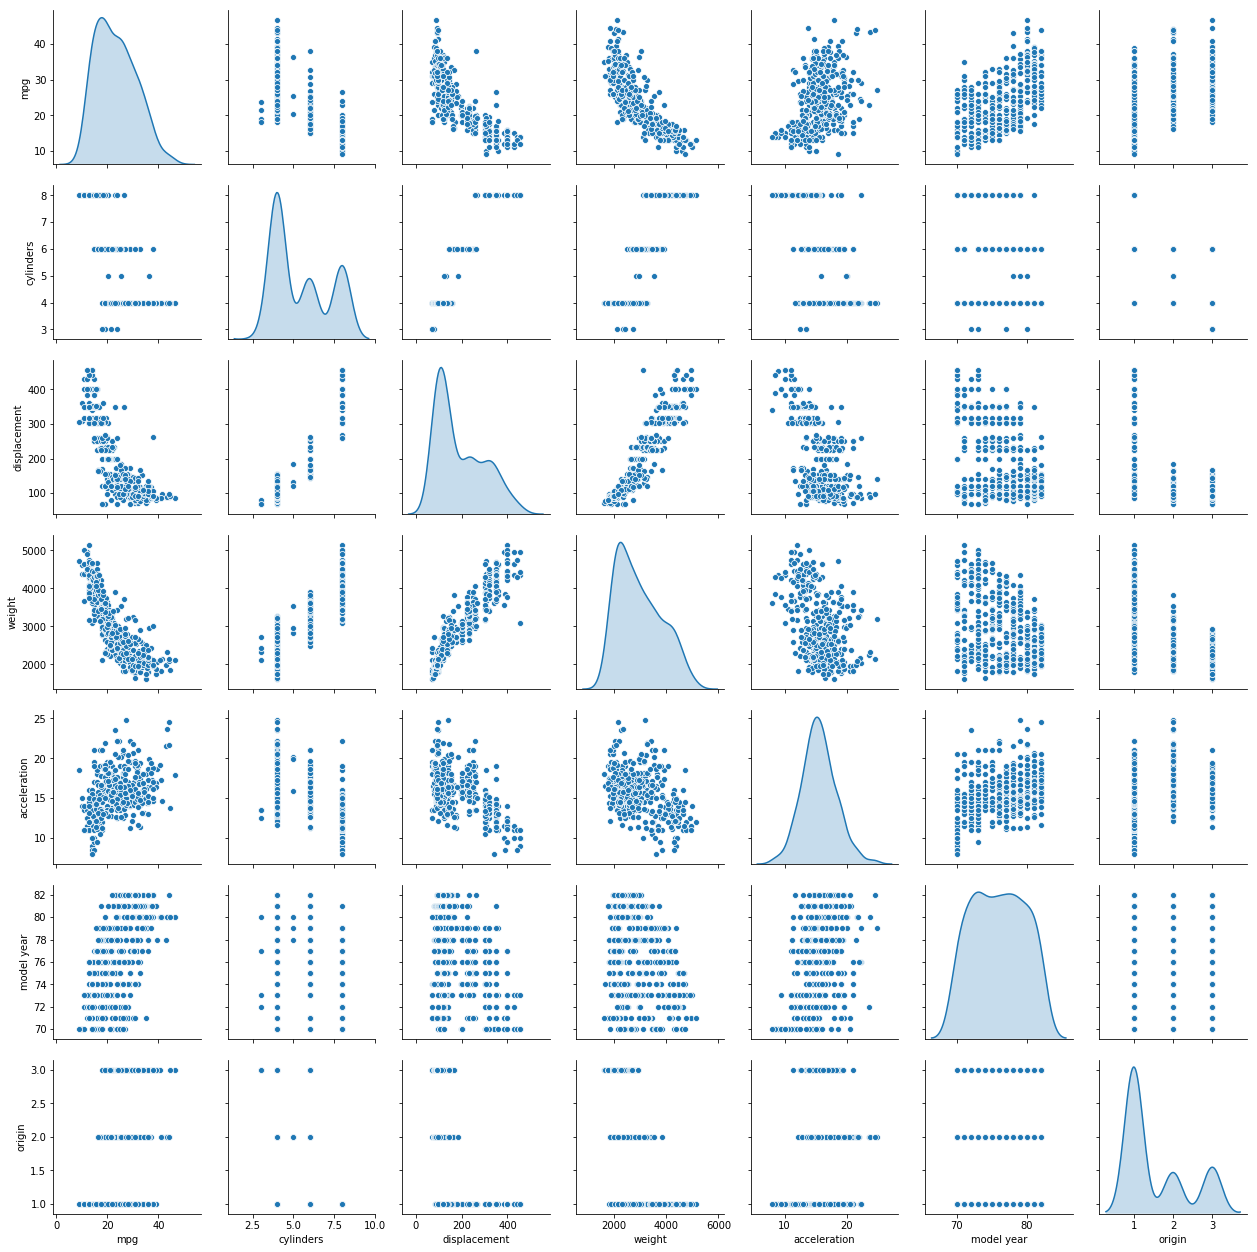

In [16]:
sns.pairplot(df,diag_kind='kde')

#### BACKWARD ELIMINATION

In [23]:
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model year', 'origin', 'car name'],
      dtype='object')

In [24]:
x_update = df.drop(['mpg','cylinders','displacement','horsepower','acceleration','car name'],axis=1)
x_update.shape

(398, 3)

In [25]:
x_update.head()

,weight,model year,origin
0,3504,70,1
1,3693,70,1
2,3436,70,1
3,3433,70,1
4,3449,70,1


### POLYNOMIAL REGRESSION

In [22]:
from sklearn.preprocessing import PolynomialFeatures

In [26]:
from sklearn.preprocessing import PolynomialFeatures
qr = PolynomialFeatures(degree=2)
x_qr = qr.fit_transform(x_update[['weight']])

In [28]:
x_qr[:3,:]

array([[1.0000000e+00, 3.5040000e+03, 1.2278016e+07],
       [1.0000000e+00, 3.6930000e+03, 1.3638249e+07],
       [1.0000000e+00, 3.4360000e+03, 1.1806096e+07]])

##### The above array is denoting weight**0 , weight**1 , weight**2 i.e (weight power 0, weight power 1, weight power 2)

In [36]:
x_qr_df = pd.DataFrame(x_qr)
x_qr_df

,0,1,2
0,1.0,3504.0,12278016.0
1,1.0,3693.0,13638249.0
2,1.0,3436.0,11806096.0
3,1.0,3433.0,11785489.0
4,1.0,3449.0,11895601.0
5,1.0,4341.0,18844281.0
6,1.0,4354.0,18957316.0
7,1.0,4312.0,18593344.0
8,1.0,4425.0,19580625.0
9,1.0,3850.0,14822500.0


In [37]:
x_qr_df = x_qr_df.drop([0,1],axis = 1)

In [38]:
df_final = pd.concat([x_update,x_qr_df,y],axis=1)
df_final.head()

,weight,model year,origin,2,mpg
0,3504,70,1,12278016.0,18.0
1,3693,70,1,13638249.0,15.0
2,3436,70,1,11806096.0,18.0
3,3433,70,1,11785489.0,16.0
4,3449,70,1,11895601.0,17.0


In [39]:
df_final.columns = ['wt','yr','origin','wt_squared','mpg']

In [41]:
df_final.head()

,wt,yr,origin,wt_squared,mpg
0,3504,70,1,12278016.0,18.0
1,3693,70,1,13638249.0,15.0
2,3436,70,1,11806096.0,18.0
3,3433,70,1,11785489.0,16.0
4,3449,70,1,11895601.0,17.0


In [44]:
import statsmodels.formula.api as smf
m1 = smf.ols('mpg~wt+yr+origin+wt_squared',df_final).fit()

In [45]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     569.7
Date:                Thu, 16 Apr 2020   Prob (F-statistic):          4.54e-162
Time:                        10:38:05   Log-Likelihood:                -1001.2
No. Observations:                 398   AIC:                             2012.
Df Residuals:                     393   BIC:                             2032.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1602      3.994     -0.040      0.968      -8.013       7.693
wt            -0.0207      0.002    -13.601      0.000      -0.024      -0.018
yr             0.8263      0.044     18.966      0.000       0.741       0.912
origin         0.5097      0.241      2.113      0.035       0.035       0.984
wt_squared  2.251e-06   2.31e-07      9.747      0.000     1.8e-06    2.71e-06
==============================================================================
Omnibus:                       64.629   Durbin-Watson:                   1.358
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              161.412
Skew:                           0.801   Prob(JB):                     8.91e-36
Kurtosis:                       5.677   Cond. No.                     2.91e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.91e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
m1.params

Intercept    -0.160193
wt           -0.020673
yr            0.826267
origin        0.509746
wt_squared    0.000002
dtype: float64

In [48]:
x_final = df_final.drop('mpg',axis=1)
y = df['mpg']

In [49]:
LR = LinearRegression()
LR.fit(x_final,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [59]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR],['Quadratic_Regression']):
    rmse=[]
    for train_idx,test_idx in kf.split(x_final,y):
        xtrain,xtest=x_final.iloc[train_idx,:],x_final.iloc[test_idx,:]
        ytrain,ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(xtrain,ytrain)
        y_pred=model.predict(xtest)
        mse=metrics.mean_squared_error(ytest,y_pred)
        rmse.append(np.sqrt(mse))
    print('RMSE scores: %0.03f (+/- %0.5f)[%s]' % (np.mean(rmse),np.std(rmse,ddof=1),name))

RMSE scores: 3.021 (+/- 0.36898)[Quadratic_Regression]


### LINEAR REGRESSION MODEL

In [84]:
x_for_lr = df_final[['wt','yr','origin']]

In [85]:
lr = LinearRegression()
lr.fit(x_for_lr,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR],['Linear_Regression']):
    rmse=[]
    for train_idx,test_idx in kf.split(x_for_lr,y):
        xtrain,xtest=x_for_lr.iloc[train_idx,:],x_for_lr.iloc[test_idx,:]
        ytrain,ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(xtrain,ytrain)
        y_pred=model.predict(xtest)
        mse=metrics.mean_squared_error(ytest,y_pred)
        rmse.append(np.sqrt(mse))
    print('RMSE scores: %0.03f (+/- %0.5f)[%s]' % (np.mean(rmse),np.var(rmse,ddof=1),name))

RMSE scores: 3.353 (+/- 0.09868)[Linear_Regression]


### RIDGE AND LASSO FOR POLYNOMIAL MODEL

In [56]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
LR = LinearRegression()
RD = Ridge(alpha=0.35,normalize=True)
LS = Lasso(alpha=0.99,normalize=True)

In [58]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR,RD,LS],['Quadratic_Regression','Ridge Regression','Lasso Regression']):
    rmse=[]
    for train_idx,test_idx in kf.split(x_final,y):
        xtrain,xtest=x_final.iloc[train_idx,:],x_final.iloc[test_idx,:]
        ytrain,ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(xtrain,ytrain)
        y_pred=model.predict(xtest)
        mse=metrics.mean_squared_error(ytest,y_pred)
        rmse.append(np.sqrt(mse))
    print('RMSE scores: %0.03f (+/- %0.5f)[%s]' % (np.mean(rmse),np.std(rmse,ddof=1),name))

RMSE scores: 3.021 (+/- 0.36898)[Quadratic_Regression]
RMSE scores: 3.595 (+/- 0.33217)[Ridge Regression]
RMSE scores: 7.812 (+/- 0.27268)[Lasso Regression]


### RIDGE AND LASSO FOR POLYNOMIAL MODEL WITH GRIDSEARCH

In [62]:
RD1 = Ridge(normalize=True)
LS1 = Lasso(normalize=True)

In [63]:
from sklearn.model_selection import GridSearchCV
param_rd = {'alpha':np.arange(0.01,1,0.01)}
param_ls = {'alpha':np.arange(0.01,1,0.01)}


In [64]:
GS_RD = GridSearchCV(RD1,param_rd,cv=5,scoring='r2')
GS_RD.fit(x_final,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.2...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [65]:
GS_RD.best_params_

{'alpha': 0.01}

In [68]:
GS_LS = GridSearchCV(LS1,param_ls,cv=5,scoring='r2')
GS_LS.fit(x_final,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0....
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='r2', verbose=0)

In [69]:
GS_LS.best_params_

{'alpha': 0.01}

In [70]:
RD1 = Ridge(alpha=0.01,normalize=True)
LS1 = Lasso(alpha=0.01,normalize=True)

In [88]:
from sklearn.model_selection import KFold
from sklearn import metrics
kf=KFold(n_splits=5,shuffle=True,random_state=0)
for model,name in zip([LR,RD1,LS1],['Quadratic Regression','Ridge Regression','Lasso Regression']):
    rmse=[]
    for train_idx,test_idx in kf.split(x_final,y):
        xtrain,xtest=x_final.iloc[train_idx,:],x_final.iloc[test_idx,:]
        ytrain,ytest=y.iloc[train_idx],y.iloc[test_idx]
        model.fit(xtrain,ytrain)
        y_pred=model.predict(xtest)
        mse=metrics.mean_squared_error(ytest,y_pred)
        rmse.append(np.sqrt(mse))
    print('RMSE scores: %0.03f (+/- %0.5f)[%s]' % (np.mean(rmse),np.var(rmse,ddof=1),name))

RMSE scores: 3.021 (+/- 0.13615)[Quadratic Regression]
RMSE scores: 3.187 (+/- 0.10993)[Ridge Regression]
RMSE scores: 3.359 (+/- 0.11403)[Lasso Regression]


In [80]:
(3.187-3.021)*100/3.187

5.20866018198933

In [81]:
(0.36898-0.33156)*100/0.36898

10.141471082443482

### RIDGE AND LASSO FOR POLYNOMIAL MODEL WITH GRIDSEARCH AND MEAN SQUARED ERROR

In [73]:
RD2 = Ridge(normalize=True)
LS2 = Lasso(normalize=True)

In [95]:
from sklearn.model_selection import GridSearchCV
param_rd = {'alpha':np.arange(0.01,1,0.01)}
param_ls = {'alpha':np.arange(0.01,1,0.01)}

In [96]:
GS_RD1 = GridSearchCV(RD2,param_rd,cv=5,scoring='neg_mean_squared_error')
GS_RD1.fit(x_final,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.2...
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', ver

In [92]:
GS_RD1.best_params_

{'alpha': 0.01}

In [77]:
GS_LS1 = GridSearchCV(LS2,param_ls,cv=5,scoring='neg_mean_squared_error')
GS_LS1.fit(x_final,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0....
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_square

In [78]:
GS_LS1.best_params_

{'alpha': 0.01}

###### The alpha values are same for both the scoring methods, i.e 'r2' and 'neg_mean_squared_error'

## CONCLUSION

###### RMSE scores: 3.021 (+/- 0.13615)[Quadratic Regression]
###### RMSE scores: 3.187 (+/- 0.10993)[Ridge Regression]
###### RMSE scores: 3.359 (+/- 0.11403)[Lasso Regression]
###### RMSE scores: 3.353 (+/- 0.09868)[Linear_Regression]

### BIAS ERROR RANKINGS

###### 1)Quadratic Regression
###### 2)Ridge Regression
###### 3)Linear Regression
###### 4)Lasso Regression

### VARIANCE ERROR RANKINGS

###### 1)Linear Regression
###### 2)Ridge Regression
###### 3)Lasso Regression
###### 4)Quadratic Regression

###### As Quadratic Regression is at the two extreme ends i.e it is 1st in Bias Error and last in Variance Error, it is not a good idea to select it. Lasso is 3rd and last in both the rankings. So even that gets rejected. The remaining Ridge and Linear regression models can be chosen. If you need a model with low bias error,go with Ridge Regression or if you need a model with low variance error, go with Linear Regression.